<div class='status' style='background-color: #183a4b; color: white; padding-top: 4px; padding-bottom: 4px; padding-left: 20px; padding-right: 20px; border-radius: 10px; font-family: Arial, sans-serif; font-size: 26px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.5);'><b>Fake GP Reviews</B> - REAL/FAKE Reviews EDA</div>

## Loading Libraries

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime
import os
from tqdm import tqdm

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings("ignore")

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

<div class='status' style='background-color: #f5c244; color: white; padding-top: 2px; padding-bottom: 2px; padding-left: 7px; padding-right: 7px; border-radius: 6px; font-family: Arial, sans-serif; font-size: 18px; display: inline-block; text-align: center; box-shadow: 0px 3px 4px rgba(0, 0, 0, 0.2);'><b>Loading</b> dataset</div>

In [26]:
data = pd.read_csv("../ai_medreview/data/real_gp_reviews_processed.csv")
fake_data = pd.read_csv("../ai_medreview/data/fake_gp_reviews_02_processed.csv")

In [27]:
data.head(2)

,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating_score,feedback_labels,emotion_free_text,label,abs_sentiment
0,PERSON was amazing kind and helpful The recept...,positive,0.937987,23.0,4.0,Reception Staff Interaction,admiration,0,0.937987
1,We have had Very good service from the NHS reg...,positive,0.971078,22.0,5.0,Treatment Quality,joy,0,0.971078


In [28]:
fake_data.head(2)

,free_text,generation_category,free_text_len,sentiment_free_text,sentiment_score_free_text,feedback_labels,emotion_free_text,rating
0,The GP practice is run by a friendly woman who...,Patient Respect,878,positive,0.873504,Reception Staff Interaction,disappointment,4
1,Staff were very friendly but slow. \n\nThe GP ...,Patient Respect,88,positive,0.441180,Reception Staff Interaction,disappointment,4


In [31]:
fake_data['generation_category'].value_counts()

generation_category
Patient Respect                            300
Staff Professionalism                      283
Follow-up and Continuity of Care           257
Appointment Availability                   224
Reception Staff Interaction                186
Staff Empathy and Compassion               120
Accessibility and Convenience              115
Treatment Quality                          110
Waiting Time                                83
Test Results                                73
Prescriptions and Medication Management     43
Vaccinations                                30
Patient Education and Information           25
Communication Effectiveness                 20
Environment and Ambiance                    15
Facility Cleanliness                        13
Feedback and Complaints Handling            13
Mental Health Support                        8
Surgery Website                              7
Administrative Efficiency                    7
Telehealth                              

In [32]:
fake_data['feedback_labels'].value_counts()

feedback_labels
Reception Staff Interaction                800
Staff Professionalism                      220
Follow-up and Continuity of Care           169
Appointment Availability                   147
Waiting Time                               108
Staff Empathy and Compassion               101
Test Results                                66
Patient Respect                             65
Accessibility and Convenience               48
Communication Effectiveness                 47
Feedback and Complaints Handling            33
Treatment Quality                           28
Environment and Ambiance                    27
Facility Cleanliness                        23
Prescriptions and Medication Management     20
Vaccinations                                19
Patient Education and Information            7
Mental Health Support                        3
Telehealth                                   3
Administrative Efficiency                    1
Name: count, dtype: int64

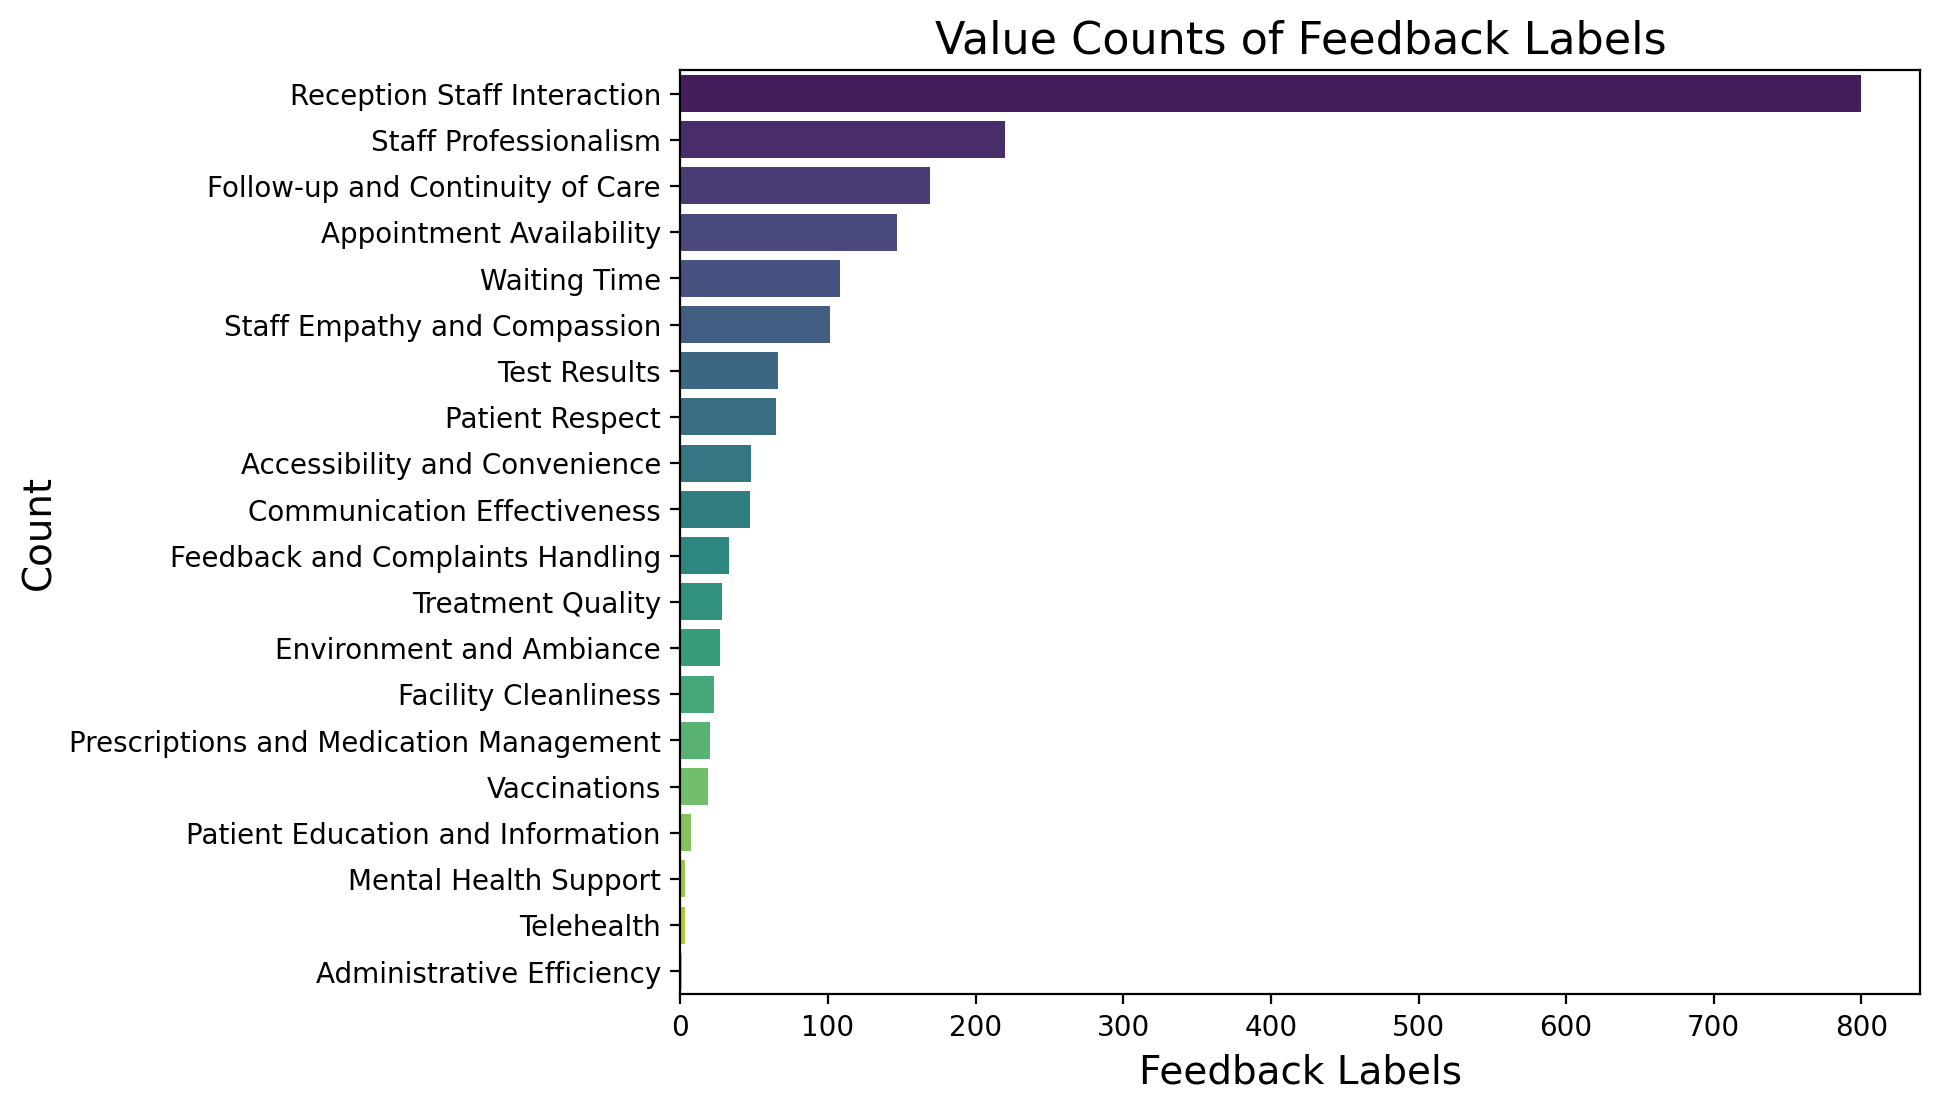

In [34]:
value_counts = fake_data['feedback_labels'].value_counts()
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(y=value_counts.index, x=value_counts.values, palette='viridis')

# Add labels and title
plt.title('Value Counts of Feedback Labels', fontsize=16)
plt.xlabel('Feedback Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()

In [22]:
data.head(2)

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id,emotion_free_text,emotion_do_better,free_text_PER,do_better_PER,campaing_id,logic,campaign_rating,campaign_freetext
0,2024-01-01 10:51:00,Very good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.0,neutral,0.0,4.0,0,5.0,NaN,NaN,mannual,upload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 15:20:00,Very good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.0,neutral,0.0,5.0,0,5.0,NaN,NaN,mannual,upload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data['abs_sentiment'] = data.apply(
    lambda row: -row['sentiment_score_free_text'] if row['sentiment_free_text'] == 'negative' else row['sentiment_score_free_text'],
    axis=1
)

In [17]:
data.head(20)

,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating_score,feedback_labels,emotion_free_text,label,abs_sentiment
3,PERSON was amazing kind and helpful The recept...,positive,0.937987,23.0,4.0,Reception Staff Interaction,admiration,0,0.937987
10,We have had Very good service from the NHS reg...,positive,0.971078,22.0,5.0,Treatment Quality,joy,0,0.971078
18,The staff polite feel welcome and comfortable ...,positive,0.819318,9.0,4.0,Staff Professionalism,gratitude,0,0.819318
19,I ve been with the Surgery for years Good serv...,positive,0.957699,14.0,5.0,Patient Respect,gratitude,0,0.957699
22,All people who works there Very kind team work...,positive,0.974714,11.0,4.0,Staff Professionalism,admiration,0,0.974714
25,I always get an appointment when I need it and...,positive,0.583609,21.0,5.0,Patient Respect,neutral,0,0.583609
26,The assistants are very helpful and professional,positive,0.966412,7.0,5.0,Staff Professionalism,admiration,0,0.966412
29,Gp is understanding and compassionate The rece...,positive,0.952338,22.0,5.0,Staff Empathy and Compassion,caring,0,0.952338
31,Nothing at all I think you are all very effeci...,negative,0.681636,15.0,4.0,Staff Professionalism,neutral,0,-0.681636
32,I was provided with the extra prescription bec...,neutral,0.745933,19.0,4.0,Prescriptions and Medication Management,neutral,0,0.745933


In [ ]:
data.to_csv("../ai_medreview/data/real_gp_reviews_processed.csv", index=False)